# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def train(optimizer_name):

    LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
    EPOCHS = 50
    BATCH_SIZE = 256
    results = {}

    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if optimizer_name == 'SGD':
            optimizer = keras.optimizers.SGD(lr=lr, momentum=0.95)
        if optimizer_name == 'RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        if optimizer_name == 'Adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        if optimizer_name == 'Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
            
        model.compile(loss="categorical_crossentropy", metrics=["acc"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
        
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title(optimizer_name + " - Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title(optimizer_name + " - Accuracy")
    plt.legend()
    plt.show()


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9137 - acc: 0.3067 - val_loss: 1.7006 - val_acc: 0.3898
Epoch 2/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.6769 - acc: 0.3985 - val_loss: 1.6093 - val_acc: 0.4295
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5930 - acc: 0.4307 - val_loss: 1.5678 - val_acc: 0.4407
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5358 - acc: 0.4513 - val_loss: 1.5064 - val_acc: 0.4644
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4924 - acc: 0.4655 - val_loss: 1.4994 - val_acc: 0.4609
Epoch 6/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4676 - acc: 0.4757 - val_loss: 1.4553 - val_acc: 0.4829
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4270 - acc: 0.4907 - val_loss: 1.4791 - 

Epoch 2/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7872 - acc: 0.3704 - val_loss: 1.7420 - val_acc: 0.3893
Epoch 3/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.7059 - acc: 0.3985 - val_loss: 1.6786 - val_acc: 0.4065
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6495 - acc: 0.4192 - val_loss: 1.6213 - val_acc: 0.4286
Epoch 5/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.6030 - acc: 0.4357 - val_loss: 1.6099 - val_acc: 0.4295
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5705 - acc: 0.4478 - val_loss: 1.5804 - val_acc: 0.4401
Epoch 7/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5364 - acc: 0.4584 - val_loss: 1.5312 - val_acc: 0.4535
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5116 - acc: 0.4691 - val_loss: 1.5268 - val_acc: 0.4598
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 125us/step - loss: 2.0176 - acc: 0.2948 - val_loss: 1.9890 - val_acc: 0.3060
Epoch 4/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9616 - acc: 0.3133 - val_loss: 1.9439 - val_acc: 0.3229
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9232 - acc: 0.3268 - val_loss: 1.9114 - val_acc: 0.3305
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8933 - acc: 0.3376 - val_loss: 1.8865 - val_acc: 0.3406
Epoch 7/50
50000/50000 [==============================] - 2014s 40ms/step - loss: 1.8693 - acc: 0.3448 - val_loss: 1.8675 - val_acc: 0.3465
Epoch 8/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8503 - acc: 0.3514 - val_loss: 1.8483 - val_acc: 0.3524
Epoch 9/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.8335 - acc: 0.3582 - val_loss: 1.8325 - val_acc: 0.3594
Epoch 10/50
50000/50000 [=================

50000/50000 [==============================] - 7s 142us/step - loss: 2.2267 - acc: 0.1944 - val_loss: 2.2174 - val_acc: 0.2002
Epoch 5/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.2066 - acc: 0.2070 - val_loss: 2.1988 - val_acc: 0.2094
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1889 - acc: 0.2195 - val_loss: 2.1823 - val_acc: 0.2185
Epoch 7/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.1728 - acc: 0.2276 - val_loss: 2.1671 - val_acc: 0.2275
Epoch 8/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1580 - acc: 0.2348 - val_loss: 2.1531 - val_acc: 0.2336
Epoch 9/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1447 - acc: 0.2404 - val_loss: 2.1406 - val_acc: 0.2386
Epoch 10/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.1329 - acc: 0.2451 - val_loss: 2.1293 - val_acc: 0.2404
Epoch 11/50
50000/50000 [===================

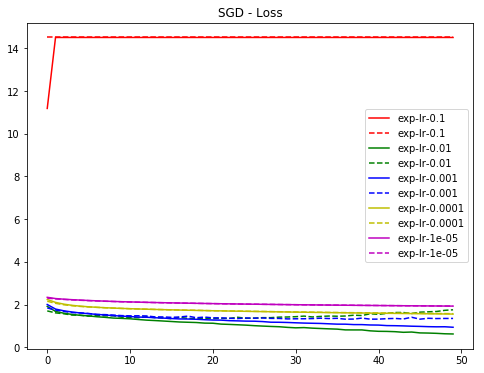

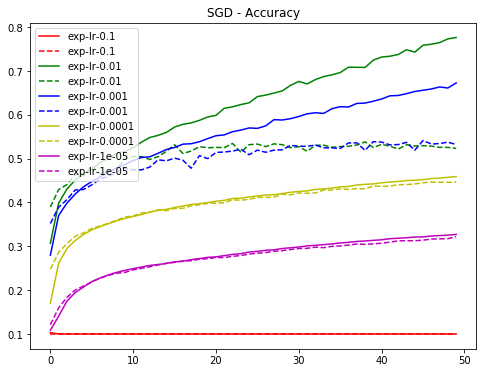

In [7]:
train(optimizer_name='SGD')

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.4415 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 163us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 145us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 7s 149us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 7s 142us/step - loss: 2.4371 - acc: 0.2137 - val_loss: 1.9605 - val_acc: 0.2789
Epoch 2/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8904 - acc: 0.3156 - val_loss: 1.8551 - val_acc: 0.3367
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7802 - acc: 0.3612 - val_loss: 1.7041 - val_acc: 0.3874
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7091 - acc: 0.3876 - val_loss: 1.6379 - val_acc: 0.4080
Epoch 5/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.6530 - acc: 0.4111 - val_loss: 1.7892 - val_acc: 0.3716
Epoch 6/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.6085 - acc: 0.4270 - val_loss: 1.6788 - val_acc: 0.4060
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5670 - acc: 0.4406 - val_loss: 1.6724 - val_acc: 0.4008
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 162us/step - loss: 1.7861 - acc: 0.3673 - val_loss: 1.9238 - val_acc: 0.3205
Epoch 3/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.7038 - acc: 0.3975 - val_loss: 1.7251 - val_acc: 0.3892
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6482 - acc: 0.4153 - val_loss: 1.6291 - val_acc: 0.4254
Epoch 5/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6092 - acc: 0.4316 - val_loss: 1.6565 - val_acc: 0.4148
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.5733 - acc: 0.4444 - val_loss: 1.5719 - val_acc: 0.4507
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5405 - acc: 0.4558 - val_loss: 1.6270 - val_acc: 0.4223
Epoch 8/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5139 - acc: 0.4662 - val_loss: 1.6769 - val_acc: 0.4118
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 139us/step - loss: 1.8907 - acc: 0.3401 - val_loss: 1.8661 - val_acc: 0.3522
Epoch 4/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8436 - acc: 0.3562 - val_loss: 1.8349 - val_acc: 0.3561
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8097 - acc: 0.3686 - val_loss: 1.8014 - val_acc: 0.3733
Epoch 6/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7822 - acc: 0.3781 - val_loss: 1.7780 - val_acc: 0.3815
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.7588 - acc: 0.3863 - val_loss: 1.7579 - val_acc: 0.3895
Epoch 8/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.7380 - acc: 0.3950 - val_loss: 1.7375 - val_acc: 0.3913
Epoch 9/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.7195 - acc: 0.4011 - val_loss: 1.7212 - val_acc: 0.3940
Epoch 10/50
50000/50000 [====================

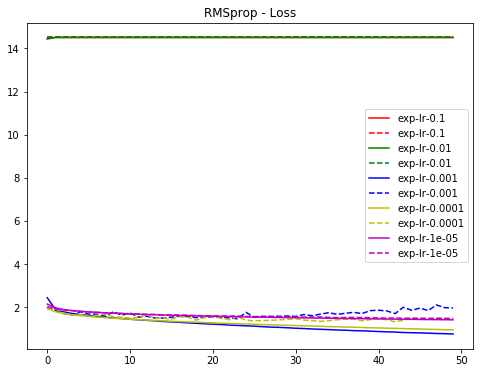

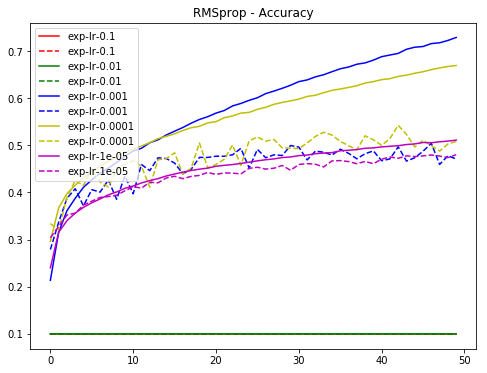

In [8]:
train(optimizer_name='RMSprop')

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.4223 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 156us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 150us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 8s 161us/step - loss: 1.9986 - acc: 0.2820 - val_loss: 1.8776 - val_acc: 0.3271
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.8028 - acc: 0.3623 - val_loss: 1.7925 - val_acc: 0.3678
Epoch 3/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7296 - acc: 0.3888 - val_loss: 1.6989 - val_acc: 0.4067
Epoch 4/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.6797 - acc: 0.4100 - val_loss: 1.7186 - val_acc: 0.3751
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6457 - acc: 0.4227 - val_loss: 1.6486 - val_acc: 0.4203
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.6188 - acc: 0.4339 - val_loss: 1.7017 - val_acc: 0.3906
Epoch 7/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.5970 - acc: 0.4403 - val_loss: 1.6368 - val_acc: 0.4070
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 8s 159us/step - loss: 1.9196 - acc: 0.3346 - val_loss: 1.8975 - val_acc: 0.3403
Epoch 3/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.8772 - acc: 0.3490 - val_loss: 1.8645 - val_acc: 0.3567
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.8507 - acc: 0.3577 - val_loss: 1.8430 - val_acc: 0.3650
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.8314 - acc: 0.3665 - val_loss: 1.8264 - val_acc: 0.3705
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8159 - acc: 0.3724 - val_loss: 1.8119 - val_acc: 0.3753
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.8030 - acc: 0.3774 - val_loss: 1.8014 - val_acc: 0.3752
Epoch 8/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7919 - acc: 0.3806 - val_loss: 1.7908 - val_acc: 0.3793
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 7s 150us/step - loss: 2.1963 - acc: 0.2204 - val_loss: 2.1831 - val_acc: 0.2322
Epoch 4/50
50000/50000 [==============================] - 8s 150us/step - loss: 2.1770 - acc: 0.2300 - val_loss: 2.1665 - val_acc: 0.2384
Epoch 5/50
50000/50000 [==============================] - 7s 149us/step - loss: 2.1620 - acc: 0.2384 - val_loss: 2.1529 - val_acc: 0.2456
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.1494 - acc: 0.2442 - val_loss: 2.1412 - val_acc: 0.2526
Epoch 7/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1383 - acc: 0.2498 - val_loss: 2.1307 - val_acc: 0.2590
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.1285 - acc: 0.2547 - val_loss: 2.1213 - val_acc: 0.2637
Epoch 9/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1196 - acc: 0.2590 - val_loss: 2.1128 - val_acc: 0.2673
Epoch 10/50
50000/50000 [====================

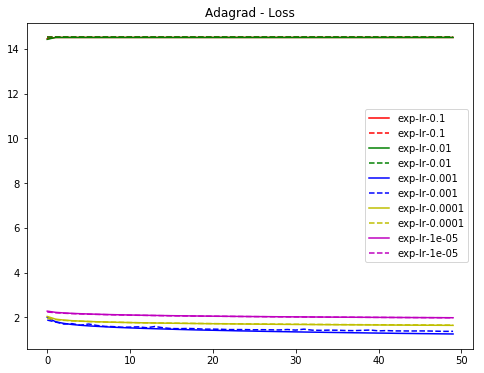

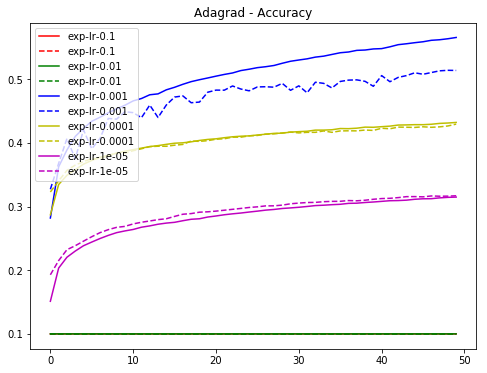

In [9]:
train(optimizer_name='Adagrad')

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 177us/step - loss: 14.4372 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 194us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_l

50000/50000 [==============================] - 9s 176us/step - loss: 1.9141 - acc: 0.3110 - val_loss: 1.7436 - val_acc: 0.3728
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6866 - acc: 0.3937 - val_loss: 1.6922 - val_acc: 0.3898
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6046 - acc: 0.4268 - val_loss: 1.5726 - val_acc: 0.4405
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.5438 - acc: 0.4498 - val_loss: 1.5163 - val_acc: 0.4635
Epoch 5/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.4943 - acc: 0.4665 - val_loss: 1.5179 - val_acc: 0.4582
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.4595 - acc: 0.4795 - val_loss: 1.4964 - val_acc: 0.4722
Epoch 7/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.4209 - acc: 0.4946 - val_loss: 1.4690 - val_acc: 0.4802
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 10s 192us/step - loss: 1.7257 - acc: 0.3917 - val_loss: 1.6818 - val_acc: 0.4083
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.6383 - acc: 0.4232 - val_loss: 1.6033 - val_acc: 0.4380
Epoch 4/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.5804 - acc: 0.4443 - val_loss: 1.5883 - val_acc: 0.4346
Epoch 5/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5404 - acc: 0.4568 - val_loss: 1.5492 - val_acc: 0.4509
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5033 - acc: 0.4708 - val_loss: 1.5171 - val_acc: 0.4570
Epoch 7/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.4758 - acc: 0.4818 - val_loss: 1.4812 - val_acc: 0.4715
Epoch 8/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.4398 - acc: 0.4963 - val_loss: 1.4664 - val_acc: 0.4812
Epoch 9/50
50000/50000 [================

50000/50000 [==============================] - 8s 164us/step - loss: 1.8703 - acc: 0.3494 - val_loss: 1.8455 - val_acc: 0.3651
Epoch 4/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.8172 - acc: 0.3672 - val_loss: 1.8042 - val_acc: 0.3746
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7791 - acc: 0.3815 - val_loss: 1.7668 - val_acc: 0.3881
Epoch 6/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7508 - acc: 0.3908 - val_loss: 1.7425 - val_acc: 0.3959
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7264 - acc: 0.4000 - val_loss: 1.7219 - val_acc: 0.4034
Epoch 8/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.7040 - acc: 0.4086 - val_loss: 1.7038 - val_acc: 0.4095
Epoch 9/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6848 - acc: 0.4170 - val_loss: 1.6911 - val_acc: 0.4119
Epoch 10/50
50000/50000 [====================

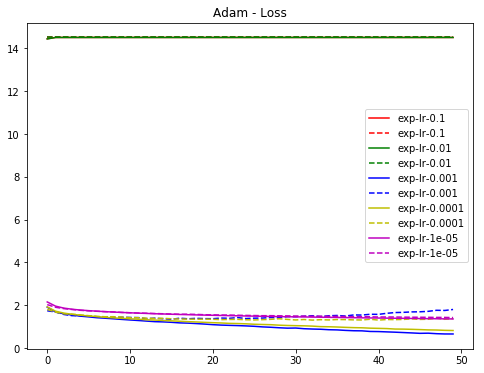

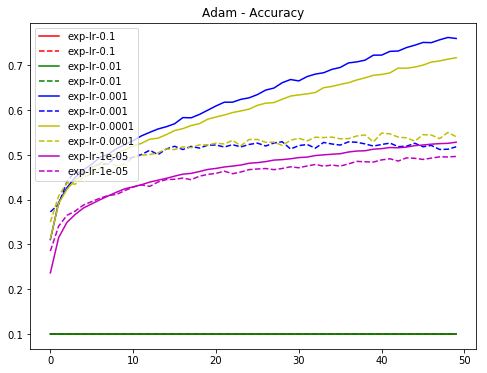

In [10]:
train(optimizer_name='Adam')